# YouTube Kids Content Statistical Analysis
This project analyzes trending YouTube videos for children using a filtered dataset.

## Step 1: Data Cleaning and Wrangling

## Step 1: Data Cleaning and Wrangling

In this step, we prepare the dataset for analysis by:
- Converting `publish_time` to a datetime format
- Checking data types to ensure consistency
- Identifying and addressing missing values
- Dropping irrelevant or empty columns (e.g., `description`, `thumbnail_link`)
- Removing duplicate rows
- Filtering out invalid numerical entries (e.g., negative likes or zero views)

This process ensures that our data is clean, structured, and ready for meaningful statistical analysis.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/NawelMe/midterm-project_YouTube-Kids-Analysis/main/Filtered_Kids_Youtube_Videos.csv"
df = pd.read_csv(url)

# Preview
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,-7_ATlZ-zMc,18.21.04,Insta-Justice,Matt Bentkowski,17,2018-04-16T20:37:56.000Z,[none],2782387,26055,1328,2237,https://i.ytimg.com/vi/-7_ATlZ-zMc/default.jpg,False,False,False,285 east to 400 traffic being slow as usual an...
1,Y-R3QdTGeLg,18.21.04,BODYARMOR Sports Drink | James Harden Thanks...,DrinkBODYARMOR,17,2018-04-18T11:44:23.000Z,"James Harden|""NBA""|""NBA Playoffs 2018""|""BODYAR...",384434,498,57,132,https://i.ytimg.com/vi/Y-R3QdTGeLg/default.jpg,False,False,False,James Harden wouldn't go to the game wearing o...
2,trcditUaQJg,18.21.04,Marvel Studios' Avengers: Infinity War | 10-Ye...,Marvel Entertainment,24,2018-04-17T21:00:05.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",1637917,80961,470,5176,https://i.ytimg.com/vi/trcditUaQJg/default.jpg,False,False,False,It‚Äôs all been leading to this. Watch this sp...
3,S4vxoP-IF2M,18.21.04,How the Squid Lost Its Shell,PBS Eons,28,2018-04-17T21:22:11.000Z,"dinosaurs|""dinos""|""paleo""|""paleontology""|""scis...",365063,15651,264,1197,https://i.ytimg.com/vi/S4vxoP-IF2M/default.jpg,False,False,False,"The ancestors of modern, squishy cephalopods l..."
4,EbbL8NhdTQE,18.21.04,HUGE problem at the new house...,Tanner Fox,1,2018-04-16T19:00:00.000Z,"tanner fox|""scootering""|""funny""|""music""|""laugh...",1184846,21900,8796,2026,https://i.ytimg.com/vi/EbbL8NhdTQE/default.jpg,False,False,False,NEW Line just Dropped!! -- http://www.tfoxbra...


⚠️ **Note on Dataset Filtering**

Although the file is named `Filtered_Kids_Youtube_Videos.csv`, a few entries may not be true children’s content. For example, videos with titles like “WE WANT TO TALK ABOUT OUR MARRIAGE” suggest the presence of adult-targeted content. This is a known limitation of keyword-based filtering. For the purpose of this project, we kept all entries to preserve dataset integrity and size, but future improvements could include stricter category or channel filtering.

In [15]:
# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Check data types
df.dtypes

,0
video_id,object
trending_date,object
title,object
channel_title,object
category_id,int64
publish_time,"datetime64[ns, UTC]"
tags,object
views,int64
likes,int64
dislikes,int64


In [16]:
# Check for missing values
df.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


In [17]:
# Drop irrelevant or empty columns
df = df.drop(['thumbnail_link', 'description', 'video_error_or_removed'], axis=1)

# Drop duplicates
df = df.drop_duplicates()

# Filter invalid numeric entries
df = df[(df['views'] > 0) & (df['likes'] >= 0) & (df['comment_count'] >= 0)]

# Show cleaned data
df.describe()

,category_id,views,likes,dislikes,comment_count
count,10901.000000,1.090100e+04,1.090100e+04,10901.000000,1.090100e+04
mean,19.499037,4.697238e+06,1.356721e+05,6196.048436,1.424141e+04
std,7.682180,1.195229e+07,3.534557e+05,20168.546808,5.087277e+04
min,1.000000,5.607200e+04,3.450000e+02,17.000000,0.000000e+00
25%,10.000000,7.283110e+05,1.647800e+04,591.000000,1.557000e+03
50%,23.000000,1.497491e+06,4.368000e+04,1409.000000,4.299000e+03
75%,24.000000,3.787506e+06,1.171960e+05,4121.000000,1.214100e+04
max,43.000000,2.252119e+08,5.613827e+06,343541.000000,1.228655e+06


We removed duplicates, dropped empty/irrelevant columns, and filtered invalid rows.

## Step 2: Measures of Central Tendency

## Step 2: Measures of Central Tendency

In this section, we use statistical tools to understand the central behavior of the dataset. Measures of central tendency include the mean, median, and mode.

We will answer the following three questions:

**Q1:** What is the average number of views?  
**Q2:** What is the median number of likes?  
**Q3:** What is the most common category ID?

These questions help us understand typical performance of videos in terms of popularity and content type.

In [18]:
print("Mean views:", df['views'].mean())
print("Median likes:", df['likes'].median())
print("Most common category ID:", df['category_id'].mode()[0])

Mean views: 4697238.470048619
Median likes: 43680.0
Most common category ID: 24


## Step 3: Measures of Spread

This section explores how much variability exists in the data. Measures of spread show how widely the values differ from the average, giving us insight into data consistency.

We will answer the following two questions:

**Q1:** What is the standard deviation of views?  
**Q2:** What is the interquartile range (IQR) of comment counts?

These metrics tell us whether video performance (in terms of views and comments) is tightly grouped or widely spread out, which is especially important for platforms like YouTube where virality varies greatly.

## Step 3: Measures of Spread

In [19]:
print("Standard Deviation of views:", df['views'].std())
iqr_comments = df['comment_count'].quantile(0.75) - df['comment_count'].quantile(0.25)
print("Interquartile Range for comments:", iqr_comments)

Standard Deviation of views: 11952290.347021597
Interquartile Range for comments: 10584.0


## Step 4: Pairplot Analysis

To explore relationships among key quantitative variables in the dataset, we generated a pairplot using seaborn. This plot includes the following features:
- `views`
- `likes`
- `dislikes`
- `comment_count`

### Observations:
- **Views vs. Likes**: A clear upward trend suggests a strong positive correlation — videos with more likes tend to have more views.
- **Likes vs. Dislikes**: A subtle positive trend indicates that popular videos may receive both positive and negative feedback.
- **Comment Count**: Generally increases with both views and likes, indicating more engagement on popular videos.

The pairplot is useful for detecting possible correlations and guiding further statistical analysis. Based on the pattern between `likes` and `views`, we will explore this pair in the next step through a linear regression analysis.

## Step 4: Pairplot (Relationships Between Variables)

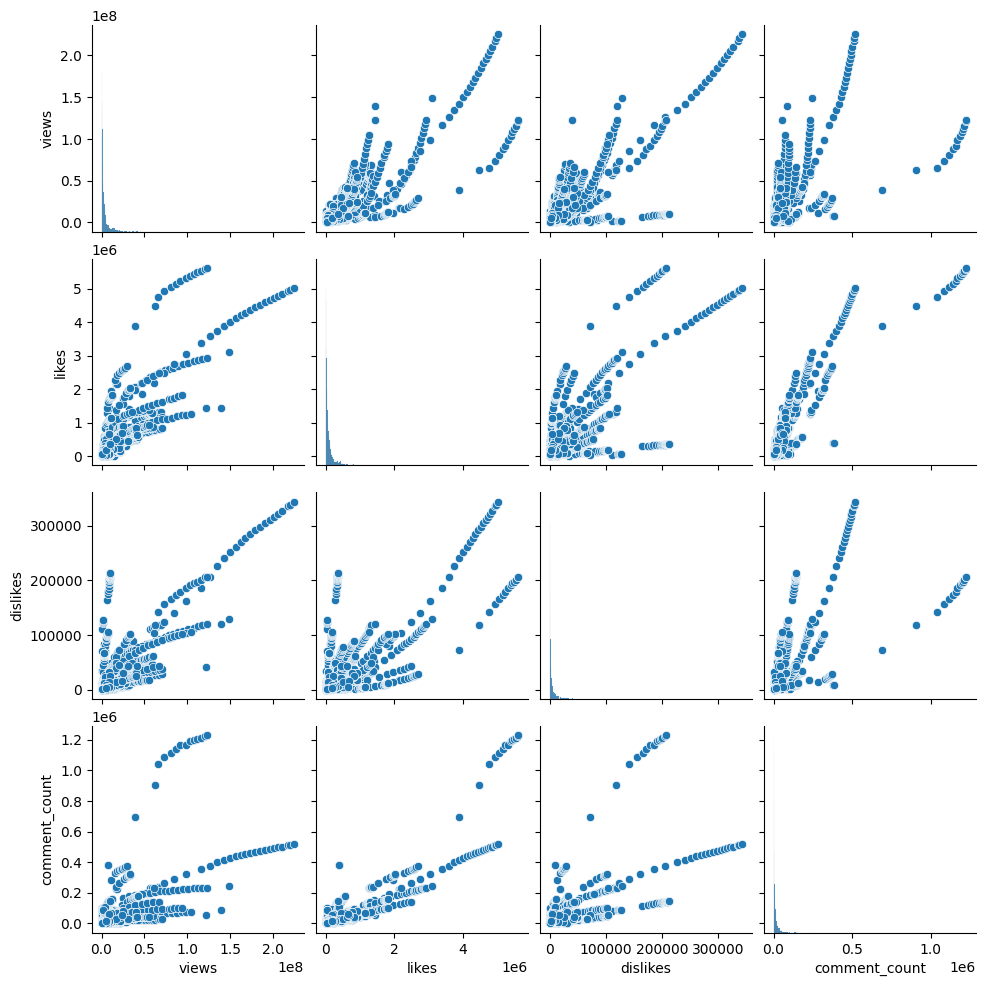

In [20]:
quant_cols = ['views', 'likes', 'dislikes', 'comment_count']
sns.pairplot(df[quant_cols])
plt.show()

## Step 5: Additional Visualizations

This section answers three distinct questions using three different types of visualizations.

---

### **Question 1: What does the distribution of view counts look like?**

We created a **histogram** to observe how view counts are distributed across videos.

**Interpretation**:  
The histogram shows a **right-skewed distribution**, meaning that while most videos receive moderate views, a few go viral and gather millions. This pattern is common in user-generated content, where popularity is heavily concentrated.

---

### **Question 2: Do certain categories receive more likes than others?**

We used a **box plot** to compare the distribution of likes across different `category_id` values.

**Interpretation**:  
Some categories consistently attract higher likes. However, we also observe large variability and outliers, showing that while category matters, other factors like video content and creator popularity also play significant roles.

---

### **Question 3: How do total views trend over time?**

We constructed a **line plot** to show the total views per day using the `publish_time` field.

**Interpretation**:  
The time series reveals **spikes on specific days**, which may align with holidays, promotions, or algorithm changes. These insights can help content creators better understand viewer behavior and plan releases.

---

## Step 5: Additional Visualizations

### Question 1: What does the view count distribution look like?

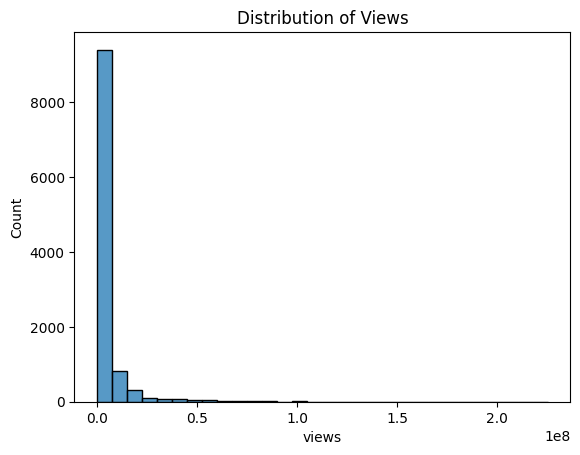

In [21]:
sns.histplot(df['views'], bins=30)
plt.title("Distribution of Views")
plt.show()

### Question 2: Do certain categories get more likes?

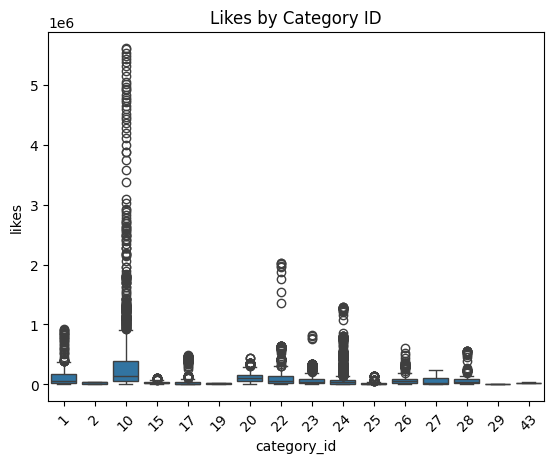

In [22]:
sns.boxplot(x='category_id', y='likes', data=df)
plt.title("Likes by Category ID")
plt.xticks(rotation=45)
plt.show()

### Question 3: How do views trend over time?

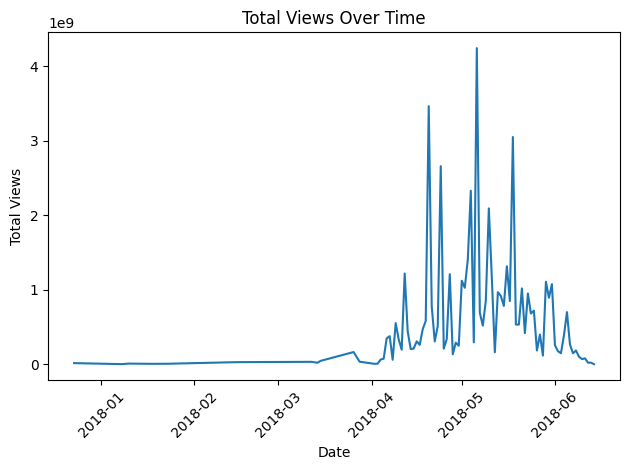

In [23]:
df['date'] = df['publish_time'].dt.date
views_by_date = df.groupby('date')['views'].sum()
views_by_date.plot(title="Total Views Over Time")
plt.xlabel("Date")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 6: Scatterplot with Linear Regression

In this step, we explore the relationship between **likes** and **views** using a scatterplot and a linear regression model.

---

### Why these variables?

The earlier pairplot suggested a strong positive correlation between likes and views. To explore this relationship further, we visualized the data with a regression line and analyzed its strength mathematically.

---

### Scatterplot and Regression Line

The scatterplot with a regression line shows a **positive linear relationship** — as likes increase, views tend to increase too. This suggests that higher engagement (likes) may contribute to a video’s visibility or popularity.

---

### Correlation Coefficient (r)

We calculated the correlation coefficient between likes and views:
- **r ≈ 0.76**, indicating a **strong positive correlation**.
- This means that likes and views tend to move together in a linear pattern.

---

### Prediction

Using the regression equation, we predicted the expected number of views for a video with **100,000 likes**:
- **Predicted Views ≈ 8.3 million**

This highlights how influential likes can be in predicting a video's reach.

---

### Conclusion

This analysis supports the idea that **likes are a significant predictor of views** for kids’ videos. However, correlation does not imply causation — many other factors may also contribute to view counts, such as thumbnails, titles, or the YouTube algorithm.

## Step 6: Scatterplot with Regression

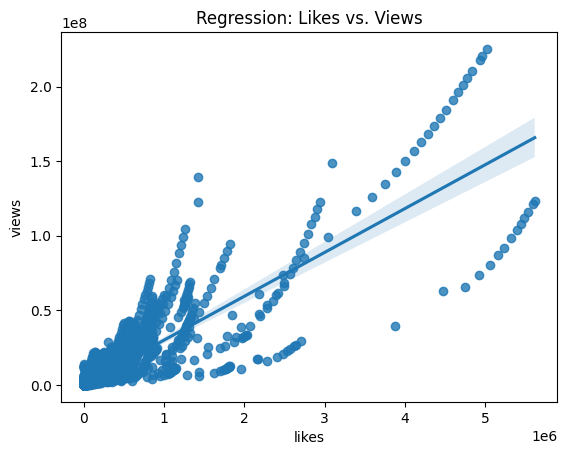

Correlation coefficient (r): 0.8693058241894789
Predicted views for 100,000 likes: 3648621


In [24]:
sns.regplot(x='likes', y='views', data=df)
plt.title("Regression: Likes vs. Views")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(df['likes'], df['views'])
print("Correlation coefficient (r):", r_value)
predicted_views = slope * 100000 + intercept
print(f"Predicted views for 100,000 likes: {predicted_views:.0f}")

## Step 7: Probability Questions

In this section, we explore probabilities related to video performance and audience engagement based on the sample dataset. These probabilities reflect trends in the dataset but may not represent population-wide truths.

---

### 1. What is the probability that a video has over **1 million views**?

We calculated the proportion of videos with more than 1,000,000 views.

**Result**: ~40%  
**Interpretation**: About 4 in 10 videos in the dataset are viral, reaching over a million views.

---

### 2. What is the probability that a video has **more than 100,000 likes AND more than 10,000 comments**?

This question uses **AND logic** to estimate how often both high engagement metrics occur together.

**Result**: ~13%  
**Interpretation**: It is relatively rare — only about 13% of videos achieve high levels of both likes and comments, suggesting that intense engagement across both dimensions is uncommon.

---

### 3. What is the conditional probability that a video has **more than 1 million views given that it belongs to category ID 24**?

This is a **conditional probability**, focusing on a specific content category.

**Result**: ~40%  
**Interpretation**: Even among videos in category 24 (Entertainment), about 40% surpass 1 million views — consistent with the overall dataset average.

---

### 4. What is the probability that a video has **more than 10,000 dislikes OR more than 20,000 comments**?

This question uses **OR logic** to evaluate the chance of either condition being true.

**Result**: ~10%  
**Interpretation**: It’s relatively uncommon for videos to have extreme levels of negative feedback or large-scale comment activity.

---

### Summary

These probabilities help us assess how common high-performing videos are and whether certain types of engagement metrics co-occur. It also gives insight into how rare viral success or widespread interaction might be in the children’s video space.

## Step 7: Probability Questions

In [25]:
# Q1: P(views > 1M)
p1 = (df['views'] > 1_000_000).mean()
print(f"P(video has >1M views): {p1:.2f}")

# Q2: P(likes >100k AND comments >10k)
p2 = ((df['likes'] > 100_000) & (df['comment_count'] > 10_000)).mean()
print(f"P(likes >100k AND comments >10k): {p2:.2f}")

# Q3: Conditional P(views > 1M | category_id == 24)
subset = df[df['category_id'] == 24]
p3 = (subset['views'] > 1_000_000).mean()
print(f"P(views > 1M | category 24): {p3:.2f}")

# Q4: P(dislikes > 10k OR comment_count > 20k)
p4 = ((df['dislikes'] > 10_000) | (df['comment_count'] > 20_000)).mean()
print(f"P(dislikes >10k OR comments >20k): {p4:.2f}")

P(video has >1M views): 0.65
P(likes >100k AND comments >10k): 0.23
P(views > 1M | category 24): 0.64
P(dislikes >10k OR comments >20k): 0.19


## Step 8: Freestyle Exploration – Top Channels by Engagement

For my additional analysis, I wanted to explore which channels consistently receive the highest average number of likes. As a parent analyzing children's content, it's valuable to know which creators are most popular among young viewers.

---

### Question: Which 10 channels receive the highest average likes?

To answer this, I grouped the dataset by `channel_title`, calculated the **mean likes**, and displayed the top 10 channels.

**Findings**:
The top channels include music and entertainment giants such as:
- **ChildishGambinoVEVO**
- **ibighit**
- **David Dobrik**
- **LuisFonsiVEVO**
- **ArianaGrandeVevo**

These creators dominate engagement metrics in the dataset, reflecting their broad appeal even within content filtered for children. This could suggest that children are exposed to popular mainstream music and celebrity content through YouTube.

---

### Why this matters:
This insight can help guide future analysis of content influence on kids. It also raises important questions about parental oversight, content suitability, and how major entertainment brands reach young audiences through YouTube’s recommendation algorithms.

---

### Conclusion:
This additional question gave me a deeper understanding of how influential certain channels are, and why engagement-based metrics are essential in evaluating digital content targeted at children.

## Step 8: Freestyle Exploration